In [1]:
from glob import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage, stats

import os
import pandas as pd
import persim

In [2]:
def read_binary_img(filename, threshold=100):
    bimg = cv2.imread(filename)[:,:,0]
    bimg[bimg < threshold] = 0
    bimg[bimg > 0] = 1
    bimg = bimg.astype(bool)

    return bimg

In [4]:
box_params = {'widths':0.75, 'patch_artist':True, 'medianprops':{'lw':3, 'color':'silver'} }
colors = ['red', 'cornflowerblue']

imtype = ['Diseased', 'Healthy', 'Binary']
genotypes = ['CAL','MLB','222','299','517','521']
runnum = 1
geodesic = 'base'
#geodesic = 'tips'

src = '../run{:02d}/'.format(runnum)
dst = src + 'diagnostic/'

gsrc = src + 'gudhi/'

gidx = 3

dfilenames = sorted(glob(gsrc + '*{}*_-_{}_geodesic_{}_H0.csv'.format(genotypes[gidx], geodesic, imtype[0].lower()) ) )
hfilenames = sorted(glob(gsrc + '*{}*_-_{}_geodesic_{}_H0.csv'.format(genotypes[gidx], geodesic, imtype[1].lower()) ) )
print(len(hfilenames))
hfilenames

8


['../run01/gudhi/299F_side1_022817046_-_base_geodesic_healthy_H0.csv',
 '../run01/gudhi/299F_side1_030117064_-_base_geodesic_healthy_H0.csv',
 '../run01/gudhi/299F_side2_022817047_-_base_geodesic_healthy_H0.csv',
 '../run01/gudhi/299F_side2_030117065_-_base_geodesic_healthy_H0.csv',
 '../run01/gudhi/299M_side1_022817070_-_base_geodesic_healthy_H0.csv',
 '../run01/gudhi/299M_side1_030117062_-_base_geodesic_healthy_H0.csv',
 '../run01/gudhi/299M_side2_022817071_-_base_geodesic_healthy_H0.csv',
 '../run01/gudhi/299M_side2_030117063_-_base_geodesic_healthy_H0.csv']

../run01/diagnostic/base_geodesic_histogram_-_299M_side2_030117063


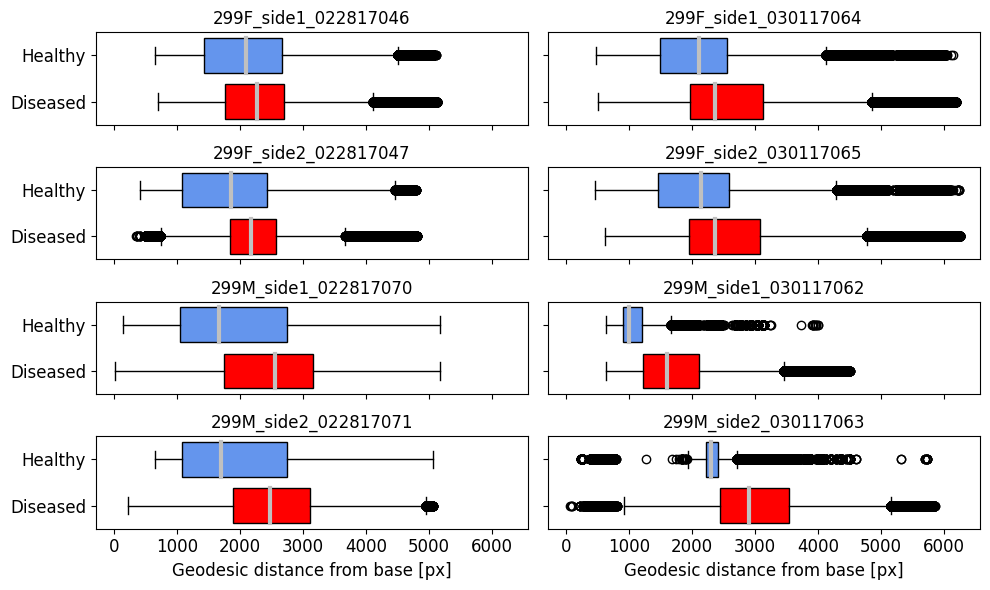

In [109]:
fs = 12
fig, ax = plt.subplots(4,2, figsize=(10,1.5*len(hfilenames)//2), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel(); i = 0

for idx in range(len(hfilenames)):
    hhist = np.loadtxt(hfilenames[idx], delimiter=',', dtype=int)
    dhist = np.loadtxt(dfilenames[idx], delimiter=',', dtype=int)
    bname = os.path.splitext(os.path.split(hfilenames[idx])[1])[0].split('_-_')[0]
    boxes = [np.repeat( np.arange(1,len(hist)+1), hist ) for hist in [hhist, dhist] ]
    
    bplot = ax[i].boxplot(boxes, vert=False, **box_params)
    for patch, c in zip(bplot['boxes'], colors):
        patch.set_facecolor(c)
    
    ax[i].set_title('{}'.format(bname), fontsize=fs)
    ax[i].set_yticks(range(1,3), imtype[:2])
    ax[i].tick_params(labelsize=fs);
    i+=1

for i in range(len(ax) - 2, len(ax)):
    ax[i].set_xlabel('Geodesic distance from {} [px]'.format(geodesic), fontsize=fs)
fig.tight_layout();

filename = dst + geodesic + '_geodesic_histogram_-_' + bname
print(filename)
plt.savefig(filename +'.png', format='png', bbox_inches='tight', dpi=200)

In [66]:
filename = ddst + 'dict_watershed_root_tip_-_' + bname
filename

NameError: name 'ddst' is not defined

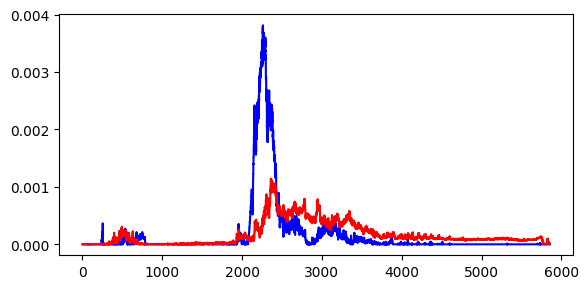

In [59]:
fig, ax = plt.subplots(1,1, figsize=(6,3), sharex=True, sharey=True)
ax = np.atleast_1d(ax).ravel(); i = 0

ax[i].plot(range(1,len(hhist)+1), hhist/np.sum(hhist), c='blue', ds='steps')
ax[i].plot(range(1,len(dhist)+1), dhist/np.sum(dhist), c='red', ds='steps')

fig.tight_layout()

# Make a proper geodesic watershed

In [6]:
hsrc

'../run01/histograms/'